In [3]:
import numpy as np
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [5]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


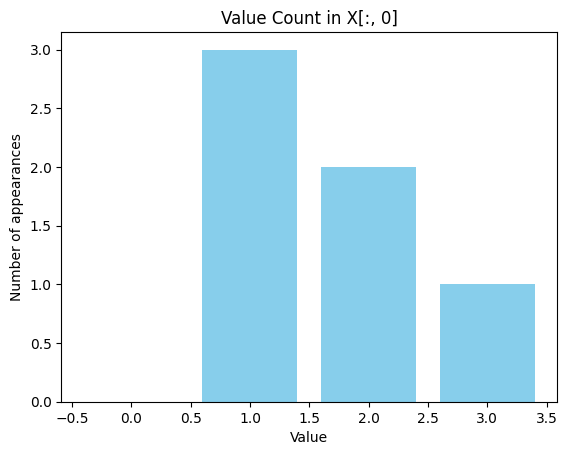

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace this with your real data)
X = np.array([[1], [2], [1], [3], [2], [1]])

# Count the number of appearances of each unique integer in X[:, 0]
bins = np.bincount(X[:, 0])

# Plotting
plt.bar(range(len(bins)), bins, color='skyblue')  # change 'color' to something visible
plt.ylabel("Number of appearances")
plt.xlabel("Value")
plt.title("Value Count in X[:, 0]")
plt.show()


In [ ]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)


In [24]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes  # example dataset
from sklearn.metrics import r2_score

# Load some example data (replace this with your own data if you have it)
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 1. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 2. Apply log transformation (if needed and data is non-negative)
# Since diabetes data has negative values, we skip log here.
# If your X values are all non-negative, then you can do:
# X_train_log = np.log1p(X_train)
# X_test_log = np.log1p(X_test)
# For this demo, we'll skip the log step.

# 3. Fit Ridge regression
model = Ridge()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

# 4. Print score
print("Test R² score: {:.3f}".format(score))


Test R² score: 0.438


In [28]:
import mglearn
citibike = mglearn.datasets.load_citibike()

In [30]:
print("Citi Bike data:\n{}".format(citibike.head()))


Citi Bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3h, Name: one, dtype: int64


Text(0, 0.5, 'Rentals')

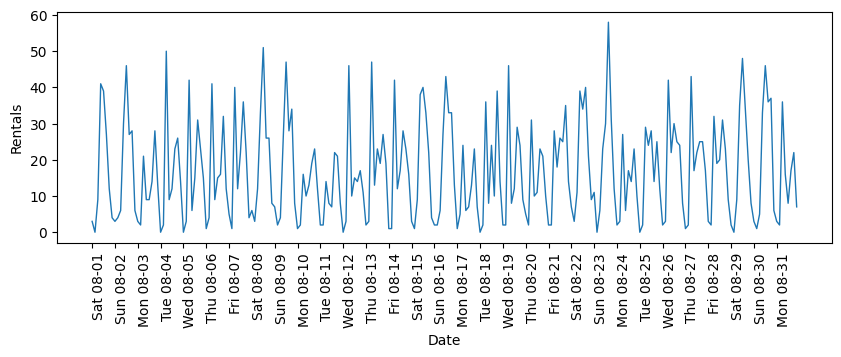

In [32]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
 freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")


In [36]:
import numpy as np

# Target values
y = citibike.values

# Convert datetime index to POSIX timestamps (in seconds)
X = (citibike.index.astype(np.int64) // 10**9).values.reshape(-1, 1)


In [38]:
# use the first 184 data points for training, and the rest for testing
n_train = 184
# function to evaluate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
 # split the given features into a training and a test set
 X_train, X_test = features[:n_train], features[n_train:]
 # also split the target array
 y_train, y_test = target[:n_train], target[n_train:]
 regressor.fit(X_train, y_train)
 print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
 y_pred = regressor.predict(X_test)
 y_pred_train = regressor.predict(X_train)
 plt.figure(figsize=(10, 3))
 plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,
 ha="left")
 plt.plot(range(n_train), y_train, label="train")
 plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
 plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
 plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
 label="prediction test")
 plt.legend(loc=(1.01, 0))
 plt.xlabel("Date")
 plt.ylabel("Rentals")


Test-set R^2: -0.04


<Figure size 640x480 with 0 Axes>

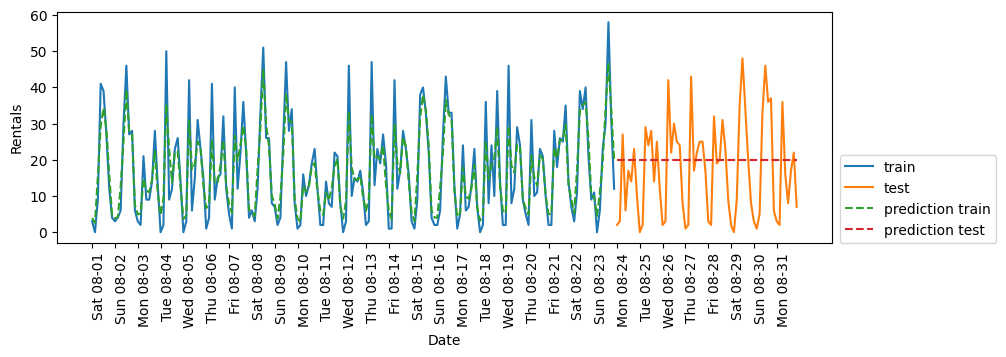

In [40]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_on_features(X, y, regressor)

Test-set R^2: 0.60


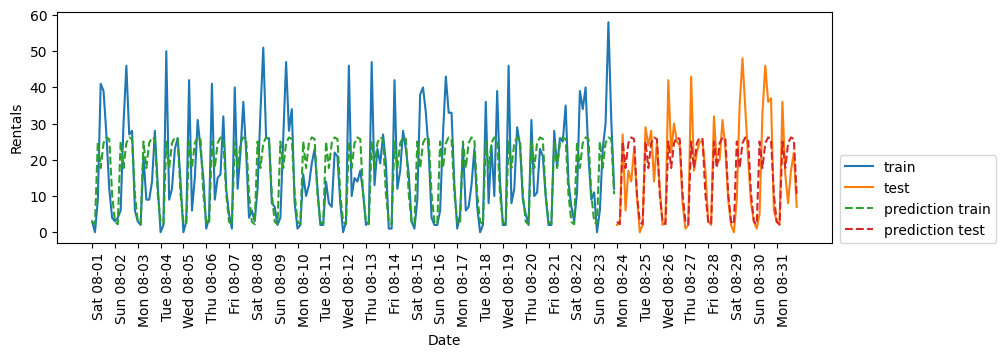

In [44]:
X_hour = citibike.index.hour.to_numpy().reshape(-1, 1)
eval_on_features(X_hour, y, regressor)


Test-set R^2: 0.84


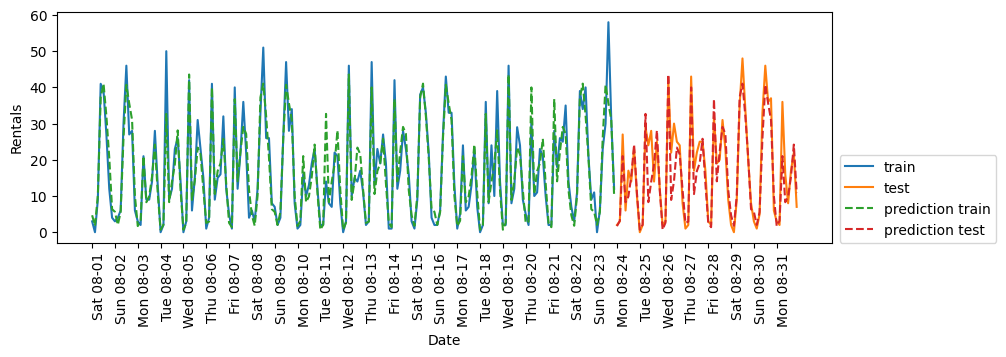

In [48]:
X_hour_week = np.hstack([
    citibike.index.dayofweek.to_numpy().reshape(-1, 1),
    citibike.index.hour.to_numpy().reshape(-1, 1)
])
eval_on_features(X_hour_week, y, regressor)


In [52]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day + hour

In [58]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# Assume X and y are already defined
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_transformer.fit_transform(X)

# Train model
lr = LinearRegression()
lr.fit(X_poly, y)

# Get feature names
features = X.columns if hasattr(X, "columns") else [f"x{i}" for i in range(X.shape[1])]
features_poly = poly_transformer.get_feature_names_out(features)

# Select non-zero coefficients
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]


Text(0, 0.5, 'Feature')

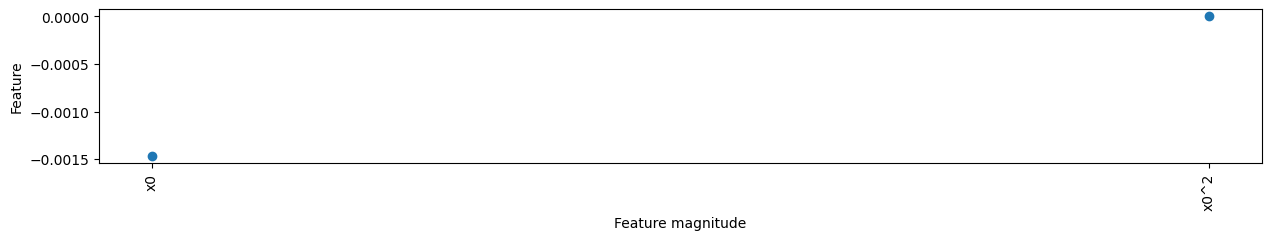

In [60]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature magnitude")
plt.ylabel("Feature")